## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52ms	remaining: 52s
1:	learn: 0.9301086	total: 55.9ms	remaining: 27.9s
2:	learn: 0.9005637	total: 59.2ms	remaining: 19.7s
3:	learn: 0.8720983	total: 62.8ms	remaining: 15.6s
4:	learn: 0.8467410	total: 65.8ms	remaining: 13.1s
5:	learn: 0.8226672	total: 69ms	remaining: 11.4s
6:	learn: 0.7994702	total: 72.1ms	remaining: 10.2s
7:	learn: 0.7784272	total: 75.1ms	remaining: 9.32s
8:	learn: 0.7602192	total: 78.3ms	remaining: 8.63s
9:	learn: 0.7412421	total: 81.5ms	remaining: 8.07s
10:	learn: 0.7247930	total: 84.9ms	remaining: 7.64s
11:	learn: 0.7089951	total: 88ms	remaining: 7.25s
12:	learn: 0.6951345	total: 91.1ms	remaining: 6.92s
13:	learn: 0.6809276	total: 94.1ms	remaining: 6.63s
14:	learn: 0.6692630	total: 97.1ms	remaining: 6.38s
15:	learn: 0.6588323	total: 100ms	remaining: 6.16s
16:	learn: 0.6472700	total: 103ms	remaining: 5.97s
17:	learn: 0.6379982	total: 106ms	remaining: 5.79s
18:	learn: 0.6294674	total: 110ms	remaining: 5.65s
19:	

43:	learn: 0.5116444	total: 188ms	remaining: 4.09s
44:	learn: 0.5100547	total: 191ms	remaining: 4.06s
45:	learn: 0.5069096	total: 194ms	remaining: 4.03s
46:	learn: 0.5051685	total: 197ms	remaining: 4s
47:	learn: 0.5033968	total: 201ms	remaining: 3.98s
48:	learn: 0.5012433	total: 203ms	remaining: 3.95s
49:	learn: 0.4986132	total: 206ms	remaining: 3.92s
50:	learn: 0.4968022	total: 209ms	remaining: 3.9s
51:	learn: 0.4951632	total: 213ms	remaining: 3.87s
52:	learn: 0.4928924	total: 215ms	remaining: 3.85s
53:	learn: 0.4917272	total: 218ms	remaining: 3.83s
54:	learn: 0.4895079	total: 222ms	remaining: 3.81s
55:	learn: 0.4881884	total: 225ms	remaining: 3.79s
56:	learn: 0.4861566	total: 228ms	remaining: 3.77s
57:	learn: 0.4850201	total: 231ms	remaining: 3.75s
58:	learn: 0.4840055	total: 234ms	remaining: 3.73s
59:	learn: 0.4824455	total: 237ms	remaining: 3.71s
60:	learn: 0.4809744	total: 240ms	remaining: 3.7s
61:	learn: 0.4801376	total: 243ms	remaining: 3.68s
62:	learn: 0.4792422	total: 246ms	re

105:	learn: 0.4457259	total: 378ms	remaining: 3.19s
106:	learn: 0.4451085	total: 381ms	remaining: 3.18s
107:	learn: 0.4447909	total: 384ms	remaining: 3.17s
108:	learn: 0.4440936	total: 387ms	remaining: 3.17s
109:	learn: 0.4435519	total: 391ms	remaining: 3.16s
110:	learn: 0.4431075	total: 394ms	remaining: 3.15s
111:	learn: 0.4425498	total: 397ms	remaining: 3.15s
112:	learn: 0.4419106	total: 400ms	remaining: 3.14s
113:	learn: 0.4414425	total: 403ms	remaining: 3.13s
114:	learn: 0.4407446	total: 407ms	remaining: 3.13s
115:	learn: 0.4402011	total: 410ms	remaining: 3.12s
116:	learn: 0.4398559	total: 413ms	remaining: 3.12s
117:	learn: 0.4392990	total: 416ms	remaining: 3.11s
118:	learn: 0.4389153	total: 419ms	remaining: 3.1s
119:	learn: 0.4383331	total: 422ms	remaining: 3.1s
120:	learn: 0.4378136	total: 425ms	remaining: 3.09s
121:	learn: 0.4375553	total: 429ms	remaining: 3.08s
122:	learn: 0.4369995	total: 431ms	remaining: 3.08s
123:	learn: 0.4366325	total: 435ms	remaining: 3.07s
124:	learn: 0.

166:	learn: 0.4176884	total: 571ms	remaining: 2.85s
167:	learn: 0.4173026	total: 575ms	remaining: 2.85s
168:	learn: 0.4170486	total: 578ms	remaining: 2.84s
169:	learn: 0.4165960	total: 581ms	remaining: 2.84s
170:	learn: 0.4161870	total: 584ms	remaining: 2.83s
171:	learn: 0.4156228	total: 587ms	remaining: 2.83s
172:	learn: 0.4153041	total: 590ms	remaining: 2.82s
173:	learn: 0.4148857	total: 593ms	remaining: 2.82s
174:	learn: 0.4144190	total: 596ms	remaining: 2.81s
175:	learn: 0.4140875	total: 599ms	remaining: 2.81s
176:	learn: 0.4136755	total: 603ms	remaining: 2.8s
177:	learn: 0.4133860	total: 606ms	remaining: 2.8s
178:	learn: 0.4129780	total: 609ms	remaining: 2.79s
179:	learn: 0.4122907	total: 612ms	remaining: 2.79s
180:	learn: 0.4119188	total: 615ms	remaining: 2.78s
181:	learn: 0.4115412	total: 618ms	remaining: 2.78s
182:	learn: 0.4112620	total: 621ms	remaining: 2.77s
183:	learn: 0.4107734	total: 624ms	remaining: 2.77s
184:	learn: 0.4104881	total: 627ms	remaining: 2.76s
185:	learn: 0.

228:	learn: 0.3963073	total: 762ms	remaining: 2.56s
229:	learn: 0.3960925	total: 765ms	remaining: 2.56s
230:	learn: 0.3957018	total: 768ms	remaining: 2.56s
231:	learn: 0.3954162	total: 771ms	remaining: 2.55s
232:	learn: 0.3951665	total: 774ms	remaining: 2.55s
233:	learn: 0.3949269	total: 777ms	remaining: 2.54s
234:	learn: 0.3945894	total: 780ms	remaining: 2.54s
235:	learn: 0.3944181	total: 783ms	remaining: 2.53s
236:	learn: 0.3941497	total: 786ms	remaining: 2.53s
237:	learn: 0.3939819	total: 789ms	remaining: 2.53s
238:	learn: 0.3938322	total: 792ms	remaining: 2.52s
239:	learn: 0.3935463	total: 795ms	remaining: 2.52s
240:	learn: 0.3933166	total: 798ms	remaining: 2.51s
241:	learn: 0.3930992	total: 802ms	remaining: 2.51s
242:	learn: 0.3928898	total: 805ms	remaining: 2.51s
243:	learn: 0.3926199	total: 808ms	remaining: 2.5s
244:	learn: 0.3923955	total: 811ms	remaining: 2.5s
245:	learn: 0.3922312	total: 814ms	remaining: 2.5s
246:	learn: 0.3919499	total: 817ms	remaining: 2.49s
247:	learn: 0.3

290:	learn: 0.3815253	total: 955ms	remaining: 2.33s
291:	learn: 0.3813529	total: 959ms	remaining: 2.32s
292:	learn: 0.3812172	total: 962ms	remaining: 2.32s
293:	learn: 0.3809978	total: 965ms	remaining: 2.32s
294:	learn: 0.3807825	total: 968ms	remaining: 2.31s
295:	learn: 0.3805940	total: 972ms	remaining: 2.31s
296:	learn: 0.3801959	total: 975ms	remaining: 2.31s
297:	learn: 0.3799439	total: 978ms	remaining: 2.3s
298:	learn: 0.3797228	total: 981ms	remaining: 2.3s
299:	learn: 0.3795554	total: 984ms	remaining: 2.3s
300:	learn: 0.3793733	total: 987ms	remaining: 2.29s
301:	learn: 0.3791607	total: 990ms	remaining: 2.29s
302:	learn: 0.3789297	total: 995ms	remaining: 2.29s
303:	learn: 0.3787482	total: 998ms	remaining: 2.28s
304:	learn: 0.3786528	total: 1s	remaining: 2.28s
305:	learn: 0.3784406	total: 1s	remaining: 2.28s
306:	learn: 0.3782934	total: 1.01s	remaining: 2.27s
307:	learn: 0.3781631	total: 1.01s	remaining: 2.27s
308:	learn: 0.3779278	total: 1.01s	remaining: 2.27s
309:	learn: 0.3777358

352:	learn: 0.3697314	total: 1.15s	remaining: 2.1s
353:	learn: 0.3695617	total: 1.15s	remaining: 2.1s
354:	learn: 0.3694397	total: 1.15s	remaining: 2.1s
355:	learn: 0.3692589	total: 1.16s	remaining: 2.09s
356:	learn: 0.3691107	total: 1.16s	remaining: 2.09s
357:	learn: 0.3689645	total: 1.16s	remaining: 2.08s
358:	learn: 0.3687886	total: 1.17s	remaining: 2.08s
359:	learn: 0.3686485	total: 1.17s	remaining: 2.08s
360:	learn: 0.3685749	total: 1.17s	remaining: 2.07s
361:	learn: 0.3683909	total: 1.17s	remaining: 2.07s
362:	learn: 0.3682710	total: 1.18s	remaining: 2.07s
363:	learn: 0.3681254	total: 1.18s	remaining: 2.06s
364:	learn: 0.3679761	total: 1.18s	remaining: 2.06s
365:	learn: 0.3677932	total: 1.19s	remaining: 2.06s
366:	learn: 0.3676022	total: 1.19s	remaining: 2.05s
367:	learn: 0.3674148	total: 1.19s	remaining: 2.05s
368:	learn: 0.3673439	total: 1.2s	remaining: 2.04s
369:	learn: 0.3671985	total: 1.2s	remaining: 2.04s
370:	learn: 0.3670563	total: 1.2s	remaining: 2.04s
371:	learn: 0.3669

414:	learn: 0.3597887	total: 1.33s	remaining: 1.88s
415:	learn: 0.3595791	total: 1.34s	remaining: 1.88s
416:	learn: 0.3594487	total: 1.34s	remaining: 1.88s
417:	learn: 0.3592759	total: 1.34s	remaining: 1.87s
418:	learn: 0.3591088	total: 1.35s	remaining: 1.87s
419:	learn: 0.3589470	total: 1.35s	remaining: 1.86s
420:	learn: 0.3587972	total: 1.35s	remaining: 1.86s
421:	learn: 0.3586831	total: 1.36s	remaining: 1.86s
422:	learn: 0.3585620	total: 1.36s	remaining: 1.85s
423:	learn: 0.3584427	total: 1.36s	remaining: 1.85s
424:	learn: 0.3583044	total: 1.37s	remaining: 1.85s
425:	learn: 0.3581698	total: 1.37s	remaining: 1.84s
426:	learn: 0.3580461	total: 1.37s	remaining: 1.84s
427:	learn: 0.3579182	total: 1.38s	remaining: 1.84s
428:	learn: 0.3577521	total: 1.38s	remaining: 1.83s
429:	learn: 0.3576138	total: 1.38s	remaining: 1.83s
430:	learn: 0.3575528	total: 1.39s	remaining: 1.83s
431:	learn: 0.3574686	total: 1.39s	remaining: 1.82s
432:	learn: 0.3572923	total: 1.39s	remaining: 1.82s
433:	learn: 

477:	learn: 0.3509121	total: 1.53s	remaining: 1.67s
478:	learn: 0.3507270	total: 1.53s	remaining: 1.66s
479:	learn: 0.3506003	total: 1.53s	remaining: 1.66s
480:	learn: 0.3505111	total: 1.54s	remaining: 1.66s
481:	learn: 0.3503906	total: 1.54s	remaining: 1.65s
482:	learn: 0.3501522	total: 1.54s	remaining: 1.65s
483:	learn: 0.3500494	total: 1.54s	remaining: 1.65s
484:	learn: 0.3498921	total: 1.55s	remaining: 1.64s
485:	learn: 0.3497143	total: 1.55s	remaining: 1.64s
486:	learn: 0.3496172	total: 1.55s	remaining: 1.64s
487:	learn: 0.3494609	total: 1.56s	remaining: 1.63s
488:	learn: 0.3493200	total: 1.56s	remaining: 1.63s
489:	learn: 0.3491550	total: 1.56s	remaining: 1.63s
490:	learn: 0.3490323	total: 1.57s	remaining: 1.62s
491:	learn: 0.3488767	total: 1.57s	remaining: 1.62s
492:	learn: 0.3487285	total: 1.57s	remaining: 1.62s
493:	learn: 0.3486318	total: 1.57s	remaining: 1.61s
494:	learn: 0.3485016	total: 1.58s	remaining: 1.61s
495:	learn: 0.3484072	total: 1.58s	remaining: 1.61s
496:	learn: 

540:	learn: 0.3426641	total: 1.72s	remaining: 1.46s
541:	learn: 0.3425885	total: 1.72s	remaining: 1.46s
542:	learn: 0.3424695	total: 1.73s	remaining: 1.45s
543:	learn: 0.3423997	total: 1.73s	remaining: 1.45s
544:	learn: 0.3422315	total: 1.73s	remaining: 1.45s
545:	learn: 0.3421242	total: 1.74s	remaining: 1.44s
546:	learn: 0.3419673	total: 1.74s	remaining: 1.44s
547:	learn: 0.3418121	total: 1.74s	remaining: 1.44s
548:	learn: 0.3416228	total: 1.74s	remaining: 1.43s
549:	learn: 0.3414331	total: 1.75s	remaining: 1.43s
550:	learn: 0.3413090	total: 1.75s	remaining: 1.43s
551:	learn: 0.3411591	total: 1.75s	remaining: 1.42s
552:	learn: 0.3410901	total: 1.76s	remaining: 1.42s
553:	learn: 0.3409923	total: 1.76s	remaining: 1.42s
554:	learn: 0.3408730	total: 1.76s	remaining: 1.41s
555:	learn: 0.3408310	total: 1.76s	remaining: 1.41s
556:	learn: 0.3407365	total: 1.77s	remaining: 1.41s
557:	learn: 0.3406506	total: 1.77s	remaining: 1.4s
558:	learn: 0.3405352	total: 1.77s	remaining: 1.4s
559:	learn: 0.

602:	learn: 0.3360683	total: 1.91s	remaining: 1.26s
603:	learn: 0.3359807	total: 1.91s	remaining: 1.25s
604:	learn: 0.3359096	total: 1.92s	remaining: 1.25s
605:	learn: 0.3358268	total: 1.92s	remaining: 1.25s
606:	learn: 0.3356597	total: 1.92s	remaining: 1.24s
607:	learn: 0.3355448	total: 1.93s	remaining: 1.24s
608:	learn: 0.3354512	total: 1.93s	remaining: 1.24s
609:	learn: 0.3353398	total: 1.93s	remaining: 1.23s
610:	learn: 0.3352669	total: 1.93s	remaining: 1.23s
611:	learn: 0.3351716	total: 1.94s	remaining: 1.23s
612:	learn: 0.3351155	total: 1.94s	remaining: 1.22s
613:	learn: 0.3350041	total: 1.94s	remaining: 1.22s
614:	learn: 0.3349098	total: 1.95s	remaining: 1.22s
615:	learn: 0.3348304	total: 1.95s	remaining: 1.21s
616:	learn: 0.3347009	total: 1.95s	remaining: 1.21s
617:	learn: 0.3346458	total: 1.95s	remaining: 1.21s
618:	learn: 0.3345381	total: 1.96s	remaining: 1.21s
619:	learn: 0.3344101	total: 1.96s	remaining: 1.2s
620:	learn: 0.3343267	total: 1.96s	remaining: 1.2s
621:	learn: 0.

664:	learn: 0.3296970	total: 2.1s	remaining: 1.06s
665:	learn: 0.3296671	total: 2.1s	remaining: 1.05s
666:	learn: 0.3295999	total: 2.11s	remaining: 1.05s
667:	learn: 0.3295390	total: 2.11s	remaining: 1.05s
668:	learn: 0.3294195	total: 2.11s	remaining: 1.04s
669:	learn: 0.3293185	total: 2.12s	remaining: 1.04s
670:	learn: 0.3292086	total: 2.12s	remaining: 1.04s
671:	learn: 0.3289913	total: 2.12s	remaining: 1.04s
672:	learn: 0.3288859	total: 2.13s	remaining: 1.03s
673:	learn: 0.3288145	total: 2.13s	remaining: 1.03s
674:	learn: 0.3286969	total: 2.13s	remaining: 1.03s
675:	learn: 0.3286108	total: 2.13s	remaining: 1.02s
676:	learn: 0.3285218	total: 2.14s	remaining: 1.02s
677:	learn: 0.3284620	total: 2.14s	remaining: 1.02s
678:	learn: 0.3283999	total: 2.14s	remaining: 1.01s
679:	learn: 0.3283506	total: 2.15s	remaining: 1.01s
680:	learn: 0.3282208	total: 2.15s	remaining: 1.01s
681:	learn: 0.3281020	total: 2.15s	remaining: 1s
682:	learn: 0.3280328	total: 2.16s	remaining: 1s
683:	learn: 0.327957

726:	learn: 0.3242076	total: 2.29s	remaining: 861ms
727:	learn: 0.3240923	total: 2.3s	remaining: 858ms
728:	learn: 0.3240148	total: 2.3s	remaining: 855ms
729:	learn: 0.3239014	total: 2.3s	remaining: 851ms
730:	learn: 0.3237918	total: 2.31s	remaining: 848ms
731:	learn: 0.3236654	total: 2.31s	remaining: 845ms
732:	learn: 0.3235938	total: 2.31s	remaining: 842ms
733:	learn: 0.3235120	total: 2.31s	remaining: 839ms
734:	learn: 0.3234421	total: 2.32s	remaining: 836ms
735:	learn: 0.3233367	total: 2.32s	remaining: 832ms
736:	learn: 0.3232438	total: 2.32s	remaining: 829ms
737:	learn: 0.3231289	total: 2.33s	remaining: 826ms
738:	learn: 0.3230697	total: 2.33s	remaining: 823ms
739:	learn: 0.3229734	total: 2.33s	remaining: 820ms
740:	learn: 0.3228697	total: 2.33s	remaining: 816ms
741:	learn: 0.3227984	total: 2.34s	remaining: 813ms
742:	learn: 0.3226895	total: 2.34s	remaining: 810ms
743:	learn: 0.3225924	total: 2.35s	remaining: 807ms
744:	learn: 0.3225096	total: 2.35s	remaining: 804ms
745:	learn: 0.3

787:	learn: 0.3187670	total: 2.48s	remaining: 668ms
788:	learn: 0.3186601	total: 2.48s	remaining: 665ms
789:	learn: 0.3185886	total: 2.49s	remaining: 662ms
790:	learn: 0.3185418	total: 2.49s	remaining: 658ms
791:	learn: 0.3184514	total: 2.49s	remaining: 655ms
792:	learn: 0.3183529	total: 2.5s	remaining: 652ms
793:	learn: 0.3182569	total: 2.5s	remaining: 649ms
794:	learn: 0.3181932	total: 2.5s	remaining: 646ms
795:	learn: 0.3180848	total: 2.51s	remaining: 643ms
796:	learn: 0.3180327	total: 2.51s	remaining: 639ms
797:	learn: 0.3179305	total: 2.51s	remaining: 636ms
798:	learn: 0.3178456	total: 2.52s	remaining: 633ms
799:	learn: 0.3177655	total: 2.52s	remaining: 630ms
800:	learn: 0.3176826	total: 2.52s	remaining: 627ms
801:	learn: 0.3176217	total: 2.52s	remaining: 623ms
802:	learn: 0.3174842	total: 2.53s	remaining: 620ms
803:	learn: 0.3173800	total: 2.53s	remaining: 617ms
804:	learn: 0.3172892	total: 2.53s	remaining: 614ms
805:	learn: 0.3172199	total: 2.54s	remaining: 611ms
806:	learn: 0.3

849:	learn: 0.3137772	total: 2.67s	remaining: 472ms
850:	learn: 0.3137138	total: 2.67s	remaining: 468ms
851:	learn: 0.3136859	total: 2.68s	remaining: 465ms
852:	learn: 0.3136054	total: 2.68s	remaining: 462ms
853:	learn: 0.3135239	total: 2.68s	remaining: 459ms
854:	learn: 0.3134711	total: 2.69s	remaining: 456ms
855:	learn: 0.3134242	total: 2.69s	remaining: 453ms
856:	learn: 0.3133249	total: 2.69s	remaining: 450ms
857:	learn: 0.3132311	total: 2.7s	remaining: 446ms
858:	learn: 0.3131446	total: 2.7s	remaining: 443ms
859:	learn: 0.3130587	total: 2.7s	remaining: 440ms
860:	learn: 0.3129229	total: 2.71s	remaining: 437ms
861:	learn: 0.3128651	total: 2.71s	remaining: 434ms
862:	learn: 0.3127812	total: 2.71s	remaining: 430ms
863:	learn: 0.3126884	total: 2.71s	remaining: 427ms
864:	learn: 0.3126358	total: 2.72s	remaining: 424ms
865:	learn: 0.3125933	total: 2.72s	remaining: 421ms
866:	learn: 0.3125160	total: 2.72s	remaining: 418ms
867:	learn: 0.3124401	total: 2.73s	remaining: 415ms
868:	learn: 0.3

910:	learn: 0.3093058	total: 2.86s	remaining: 279ms
911:	learn: 0.3092574	total: 2.86s	remaining: 276ms
912:	learn: 0.3092023	total: 2.86s	remaining: 273ms
913:	learn: 0.3091306	total: 2.87s	remaining: 270ms
914:	learn: 0.3090719	total: 2.88s	remaining: 267ms
915:	learn: 0.3090199	total: 2.88s	remaining: 264ms
916:	learn: 0.3089417	total: 2.89s	remaining: 261ms
917:	learn: 0.3088562	total: 2.89s	remaining: 258ms
918:	learn: 0.3087578	total: 2.89s	remaining: 255ms
919:	learn: 0.3086793	total: 2.9s	remaining: 252ms
920:	learn: 0.3086255	total: 2.91s	remaining: 250ms
921:	learn: 0.3085073	total: 2.91s	remaining: 246ms
922:	learn: 0.3084388	total: 2.92s	remaining: 243ms
923:	learn: 0.3083752	total: 2.92s	remaining: 240ms
924:	learn: 0.3082889	total: 2.92s	remaining: 237ms
925:	learn: 0.3081901	total: 2.92s	remaining: 234ms
926:	learn: 0.3081106	total: 2.93s	remaining: 231ms
927:	learn: 0.3080422	total: 2.93s	remaining: 227ms
928:	learn: 0.3079770	total: 2.94s	remaining: 224ms
929:	learn: 0

963:	learn: 0.3052664	total: 3.05s	remaining: 114ms
964:	learn: 0.3052264	total: 3.05s	remaining: 111ms
965:	learn: 0.3051873	total: 3.06s	remaining: 108ms
966:	learn: 0.3051018	total: 3.06s	remaining: 104ms
967:	learn: 0.3050172	total: 3.06s	remaining: 101ms
968:	learn: 0.3049470	total: 3.06s	remaining: 98.1ms
969:	learn: 0.3049028	total: 3.07s	remaining: 94.9ms
970:	learn: 0.3048446	total: 3.07s	remaining: 91.7ms
971:	learn: 0.3047712	total: 3.07s	remaining: 88.6ms
972:	learn: 0.3047313	total: 3.08s	remaining: 85.4ms
973:	learn: 0.3046600	total: 3.08s	remaining: 82.2ms
974:	learn: 0.3045983	total: 3.08s	remaining: 79.1ms
975:	learn: 0.3044944	total: 3.09s	remaining: 75.9ms
976:	learn: 0.3044431	total: 3.09s	remaining: 72.7ms
977:	learn: 0.3043959	total: 3.09s	remaining: 69.6ms
978:	learn: 0.3043249	total: 3.1s	remaining: 66.4ms
979:	learn: 0.3042644	total: 3.1s	remaining: 63.3ms
980:	learn: 0.3042142	total: 3.1s	remaining: 60.1ms
981:	learn: 0.3041509	total: 3.11s	remaining: 56.9ms
9

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3144130464639555


#### Sanity Checks 

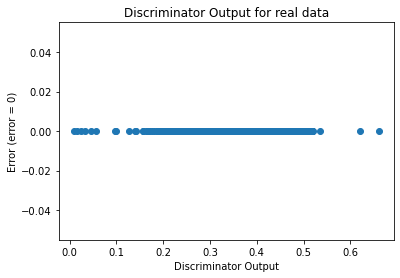

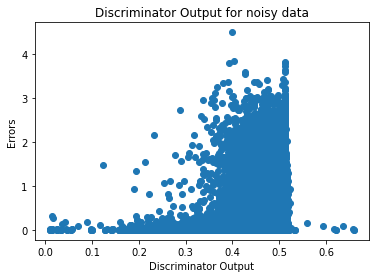

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)